In [20]:
import numpy as np

In [21]:
X = 6*np.random.rand(200,1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200,1) # quadratic equation polynomial of degree 2 

In [22]:
y

array([[10.26058866],
       [ 3.27929927],
       [ 2.23067064],
       [ 3.34105269],
       [ 3.39441772],
       [ 4.06812844],
       [ 4.15456785],
       [ 1.0039406 ],
       [ 6.39334621],
       [ 3.0544591 ],
       [ 6.14185842],
       [ 3.6406282 ],
       [ 1.64635919],
       [10.84153758],
       [ 2.84493034],
       [ 5.84604491],
       [ 4.99127814],
       [10.04577263],
       [ 9.84947049],
       [ 2.5017268 ],
       [ 2.48582663],
       [ 0.67352222],
       [ 4.95411891],
       [ 4.01022363],
       [ 1.58979169],
       [ 7.44315113],
       [ 7.87671209],
       [ 4.29893225],
       [ 2.73734223],
       [ 1.17786391],
       [ 9.81960405],
       [ 3.48967169],
       [ 5.8627683 ],
       [ 2.66066911],
       [ 1.97551154],
       [ 3.30877298],
       [ 2.85170092],
       [ 4.52710543],
       [ 4.15175321],
       [ 1.21946917],
       [ 4.9763596 ],
       [ 3.19777213],
       [ 6.11691162],
       [ 2.20334584],
       [ 1.04902891],
       [ 2

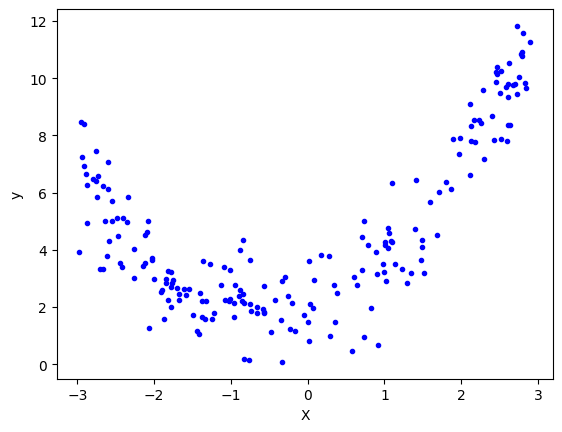

In [23]:
import matplotlib.pyplot as plt 
plt.plot(X,y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [25]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [26]:
lr.fit(X_train,y_train)


LinearRegression()

In [27]:
y_pred = lr.predict(X_test)
y_pred

array([[5.73089723],
       [4.64334279],
       [7.16187621],
       [4.49700002],
       [5.96262459],
       [6.7073702 ],
       [6.34460888],
       [4.0833089 ],
       [6.02763112],
       [3.93752463],
       [3.98207135],
       [3.17725984],
       [7.10573702],
       [2.88461418],
       [3.66782317],
       [4.42215207],
       [3.6001493 ],
       [2.55050276],
       [2.7275938 ],
       [3.23307021],
       [4.03932138],
       [2.46812063],
       [5.43773228],
       [3.31265449],
       [5.91329073],
       [3.38180765],
       [4.04430376],
       [6.85250217],
       [4.08485764],
       [3.75737882],
       [3.05395509],
       [3.21735826],
       [5.28488676],
       [3.63415038],
       [3.07839557],
       [6.98868908],
       [2.30913327],
       [3.10291419],
       [4.22406983],
       [2.54207806]])

In [28]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.2649835920024939

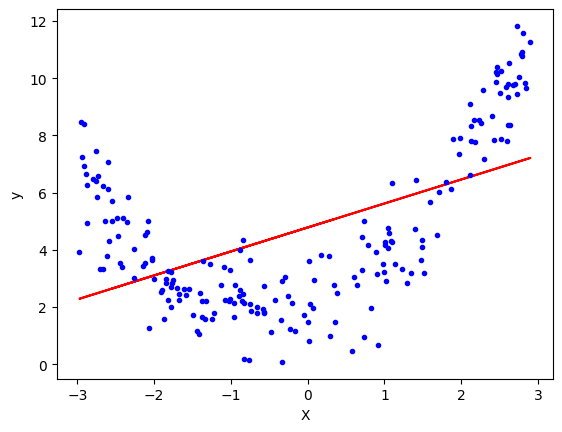

In [29]:
plt.plot(X_train,lr.predict(X_train),color='r')
plt.plot(X,y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [30]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

poly = PolynomialFeatures(degree=2)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.fit_transform(X_test)


In [31]:
print(X_train[0])

[-2.5504463]


In [32]:
print(X_train_trans[0])

# X^0 comes because the polynomial function by default uses include_bias = True

[ 1.         -2.5504463   6.50477633]


In [33]:
lr.fit(X_train_trans,y_train)

LinearRegression()

In [34]:
y_pred_poly = lr.predict(X_test_trans)
y_pred_poly

array([[ 4.05911156],
       [ 1.93230833],
       [10.98855392],
       [ 1.8531032 ],
       [ 4.8626976 ],
       [ 8.278912  ],
       [ 6.45605885],
       [ 1.89476515],
       [ 5.11023851],
       [ 2.00293792],
       [ 1.96471465],
       [ 3.3566375 ],
       [10.62823259],
       [ 4.23090485],
       [ 2.33150328],
       [ 1.83157014],
       [ 2.44011792],
       [ 5.46908168],
       [ 4.78092992],
       [ 3.21219787],
       [ 1.92227149],
       [ 5.81370958],
       [ 3.21885649],
       [ 3.01858147],
       [ 4.68130307],
       [ 2.86213231],
       [ 1.91893314],
       [ 9.09268295],
       [ 1.89387753],
       [ 2.20390907],
       [ 3.70107129],
       [ 3.25213891],
       [ 2.85891872],
       [ 2.38423481],
       [ 3.6300307 ],
       [ 9.90021296],
       [ 6.52278599],
       [ 3.56013898],
       [ 1.83655294],
       [ 5.50361041]])

In [35]:
print(r2_score(y_test,y_pred_poly))
print(lr.coef_)
print(lr.intercept_)

0.8091639870011587
[[0.         0.85833922 0.80560279]]
[2.05131179]


In [38]:
# 3D poly regression 
x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8

z = x**2 + y**2 + 0.2*x + 0.2*y +0.1*x*y + 2 + np.random.randn(100,1)

In [40]:
import plotly.express as px 
df = px.data.iris()

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,3
146,6.3,2.5,5.0,1.9,virginica,3
147,6.5,3.0,5.2,2.0,virginica,3
148,6.2,3.4,5.4,2.3,virginica,3


In [41]:
fig = px.scatter_3d(df,x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.show()

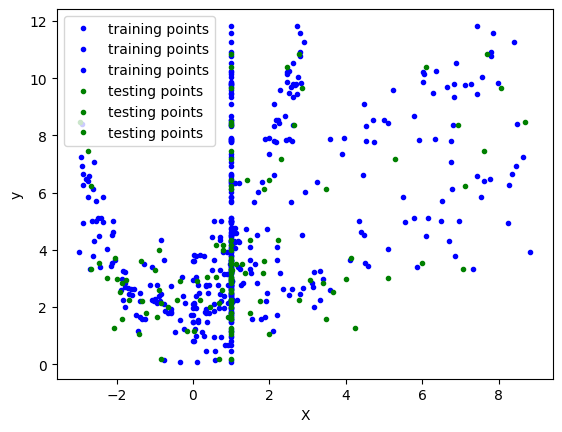

In [36]:
plt.plot(X_train_trans,y_train,"b.",label='training points')
plt.plot(X_test_trans,y_test,"g.",label="testing points")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

On changing values of the degree model starts overfitting